In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# **Support Vector Machine (SVM) Algorithm**

Perceptron vs SVM

> 1. The perceptron does not optimzie the seperation distance as long as there is a hyperplane found.

> 2. The SVM optimizes the distance between the sample points. 







> Perceptron: $min∑𝑖=1𝑛(−𝑦𝑖(𝑤𝑥𝑖+𝑤0))$

> SVM: $min‖𝑤‖2+𝐶∑𝑖=1𝑛(1−𝑦𝑖(𝑤𝑥𝑖+𝑤0))$





**Process:**

> Like the preceptron we will use a stochastic gradient descent algorithm. The gradient descent minimizes the function by following gradients of the cost function.

> To calcuate the error we need an objective function. The loss function we will use be the hinge loss function:


> $c(x,y,f(x)=(1-y*f(x))$

> SVM objective function: $min‖𝑤‖2+𝐶∑𝑖=1𝑛(1−𝑦𝑖(𝑤𝑥𝑖+𝑤0))$ It consits of the two terms, the regularizer and the loss.

> Derive the objective funtion: $\frac{\delta}{\delta w_k} \lambda\parallel w\parallel^2 \ = 2 \lambda w_k$

> $\frac{\delta}{\delta w_k} \big(1-y_i \langle x_i,w \rangle\big)_+ \ = \begin{cases}
    0,& \text{if } y_i \langle x_i,w \rangle\geq 1\\
    -y_ix_{ik},              & \text{else}
\end{cases}$

> We have to update the weight vector using the gradients. We upadte $w$ from the regularizer

> The pseudocode for stochastic gradient descent for the SVM:

> if $y_i⟨x_i,w⟩ < 1$:

> $w = w + \eta (y_ix_i - 2\lambda w)$


> else:

> $w = w + \eta (-2\lambda w)$


























# **PART 1: Linearly Seperable Points**



> Assing datapoints and add in bias.



In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [ ]:
y = np.array([-1,-1,1,1,1])

In [ ]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])



> Print the data points and visualize what the hyperplane might look like. 



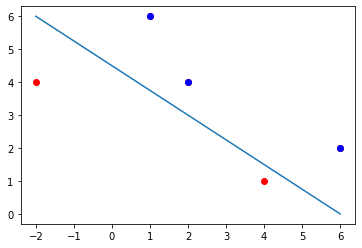

In [ ]:
plt.scatter(X[:,0], X[:,1], c='r')
plt.scatter(X[2:,0], X[2:,1], c='b')
plt.plot([-2,6],[6,0])

# **Define Baseline SVM Stochastic Gradient Descent**

In [ ]:
def SVM_stochastic_gradient_descent(X, Y):

    weights = np.zeros(len(X[0]))
    eta = 1
    EPOCHS = 100000


    for epoch in range(1,EPOCHS):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], weights)) < 1:
                weights = weights + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* weights) )
            else:
                weights = weights + eta * (-2  *(1/epoch)* weights)

    return weights

weights = SVM_stochastic_gradient_descent(X,y)
print(weights)

[ 1.58876117  3.17458055 11.11863105]


# **Stochastic Gradient Descent Alogorithm**


1.   Initialize the weight vectors from the percpetron with zeros
2.   Set learning rate
3.   Set number of EPOCHS
4.   Iterate over selected number of times
5.   Iterate over each sample
6.   Check missclassifications
7.   Update the weight rules: $w=w+y_i*x_i$
8.   If classified correctly then update weights by the derived regularizer 







> Execute the the code and calculate the proper weight vector. Then print which samples are missclassified. 



In [ ]:
def SVM_stochastic_gradient_descent(X, Y):
    weights = np.zeros(len(X[0]))
    eta = 1
    EPOCHS = 100000

    for epoch in range(1,n):
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], weights)) < 1:
                weights = weights + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* weights) )
            else:
                weights = weights + eta * (-2  *(1/epoch)* weights)

    return weights

In [ ]:
def SVM_stochastic_gradient_descent_plot(X, Y):

    weights = np.zeros(len(X[0]))
    eta = 1
    EPOCHS = 100000
    errors = []


    for epoch in range(1,EPOCHS):
        error = 0
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], weights)) < 1:
                weights = weights + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* weights) )
                error = 1
            else:
                weights = weights + eta * (-2  *(1/epoch)* weights)
        errors.append(error)

    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('EPOCHS')
    plt.ylabel('Misclassified Points')
    plt.show()

<ipython-input-8-c4fd516f0e8e>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_yticklabels([])


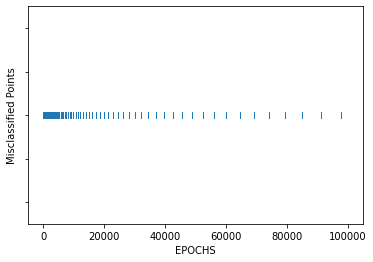

In [ ]:
SVM_stochastic_gradient_descent_plot(X,y)



> The graph shows the more training that is done the more missclassifications. The perceptron on the other hand does not reach zero missclassifications.

> The SVM always tries to optimize the hyperplane by maxmizing the distance between the two classes in contrast to the perceptron





# **Check Test Samples**



> Plot all of the samples and add the test samples. Print the hyperplane that is calculated by the SVM. 



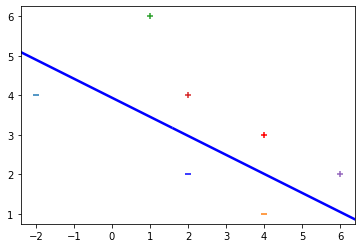

In [ ]:
for d, SAMPLE in enumerate(X):
    if d < 2:
        plt.scatter(SAMPLE[0], SAMPLE[1], marker='_')
    else:
        plt.scatter(SAMPLE[0], SAMPLE[1], marker='+')

plt.scatter(2,2, marker='_', color='blue')
plt.scatter(4,3, marker='+', color='red')

x2=[weights[0],weights[1],-weights[1],weights[0]]
x3=[weights[0],weights[1],weights[1],-weights[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

**Equation:** $f(x) = \langle x,(1.56,3.17)\rangle - 11.12$

**Weight vector:** $(1.56,3.17)$

# **PART 2: Non-Linearly Seperable Points**



> Much like how a perceptron perfoms with non-linearly seperable data, the data is too extreme for the hyperplane to properly classify the points with a hyperplane. 



In [ ]:
X = np.array([
    [-2,3,-1],
    [4,1,-1],
    [2, 4, -1],
    [5, 1, -1],
    [3, 2, -1],

])

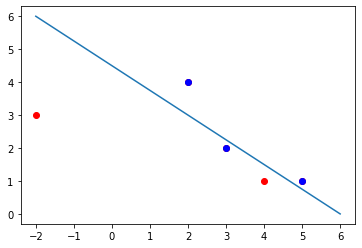

In [ ]:
plt.scatter(X[:,0], X[:,1], c='r')
plt.scatter(X[2:,0], X[2:,1], c='b')
plt.plot([-2,6],[6,0])

<ipython-input-8-c4fd516f0e8e>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_yticklabels([])


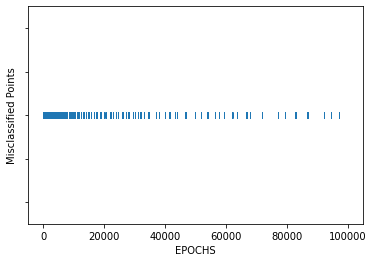

In [ ]:
SVM_stochastic_gradient_descent_plot(X,y)

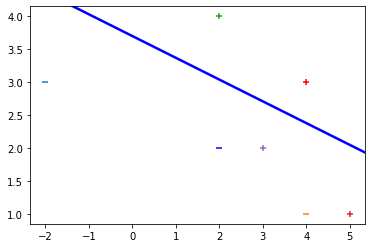

In [ ]:
for d, SAMPLE in enumerate(X):
    if d < 2:
        plt.scatter(SAMPLE[0], SAMPLE[1], marker='_')
    else:
        plt.scatter(SAMPLE[0], SAMPLE[1], marker='+')

plt.scatter(2,2, marker='_', color='blue')
plt.scatter(4,3, marker='+', color='red')

x2=[weights[0],weights[1],-weights[1],weights[0]]
x3=[weights[0],weights[1],weights[1],-weights[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [ ]:
x2x3

array([[ 1.58876117,  3.17458055, -3.17458055,  1.58876117],
       [ 1.58876117,  3.17458055,  3.17458055, -1.58876117]])

**Equation:** $f(x) = \langle x,(3.17,1.58)\rangle - 6.67$

**Weight vector:** $(3.17,1.58)$

# **References**

https://stats.stackexchange.com/questions/61189/difference-between-a-svm-and-a-perceptron

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb

Schölkopf & Smola (2002)

https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

https://www.analyticsvidhya.com/blog/2020/10/the-mathematics-behind-svm/

I Aiden Clark certify that this reportis my/our own, independent work and that it does not plagiarize,in part or in full, any other work.